In [21]:
import cv2
import re
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('invoice-sample.jpg')



In [22]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [23]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

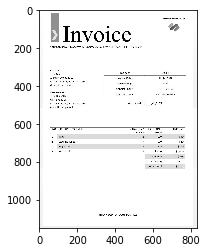

In [24]:
plt.imshow(gray, cmap='gray')
# display that image
plt.show()

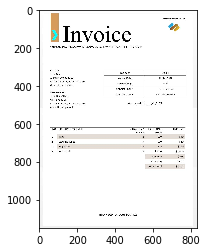

In [25]:
plt.imshow(image)
 
# display that image
plt.show()

In [29]:
custom_config = r'--oem 3 --psm 6'
str=pytesseract.image_to_string(image, config=custom_config)
print(str)

http://mrsinvoice.com
I 7
Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334
BILL TO:
P: 111-222-333, F: 111-222-334 a. z
cient@eromplent
Contact Phone 101-102-103
john Doe office ayment Terms ‘ash on Delivery
Office Road 38
P: 111-333-222, F: 122-222-334 Amount Due: $4,170
office@example.net
NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT
HOURS: PRICE
1 aye 2 $20 $40
2 | Steering Wheel 5 $10 $50
3 | Engine oil 10 $15 $150
4 | Brake Pad 24 $1000 $2,400
Subtotal $275
Tax (10%) $27.5
Grand Total $302.5
‘THANK YOU FOR YOUR BUSINESS



In [30]:
osd = pytesseract.image_to_osd(image)
print(osd)

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 0.02
Script: Latin
Script confidence: 10.81



In [35]:
d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

117

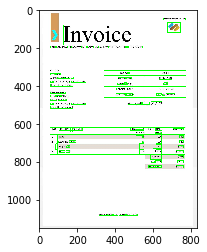

In [36]:
plt.imshow(image)
 
# display that image
plt.show()

In [41]:
pdf = pytesseract.image_to_pdf_or_hocr('invoice-sample.jpg', extension='pdf')
with open('test.pdf', 'w+b') as f:
    f.write(pdf) 